<a href="https://colab.research.google.com/github/MateusSilveiraCezar/Front-end-Sprint3/blob/main/Checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHECKPOINT


Dataset de IDH Brasileiro: https://www.kaggle.com/datasets/pauloeduneves/hdi-brazil-idh-brasil/data

# GRUPO (Até 3 pessoas):

Participantes:
- Mateus Silveira Cezar - RM557650

## Bunsiness Understanding

Utilizar informações do IDH para tentar prever se o indivíduo vai viver acima dos 60 anos

## DATA UNDERSTANDING

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Exercício 1: Importar dados.


In [11]:
df = pd.read_csv("/content/atlas.csv", engine='python', on_bad_lines='skip')
df.head()

,ano,codmun6,uf,codmun7,município,espvida,fectot,mort1,mort5,razdep,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,1991,110001,11,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,...,NaN,NaN,23417.0,22835.0,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,110002,11,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,...,NaN,NaN,56061.0,55018.0,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,110003,11,1100031,CABIXI,63.16,3.89,41.52,52.94,77.23,...,NaN,NaN,7601.0,5846.0,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,110004,11,1100049,CACOAL,65.03,3.81,35.37,45.19,71.11,...,NaN,NaN,69173.0,66534.0,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,110005,11,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,71.09,...,NaN,NaN,19451.0,19030.0,0.152,0.175,0.386,0.167,0.629,0.547


### EDA e Estatistica inferencial

Exercício 2: Descrição das colunas númericas.
Responda: Média, Valores mínimos e maximos de cada coluna.


In [12]:
df.describe(include=[int, float]).loc[['mean', 'min', 'max']]

,ano,codmun6,uf,codmun7,espvida,fectot,mort1,mort5,razdep,sobre40,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
mean,1999.865048,325796.837028,32.428757,3.257973e+06,68.157625,2.968929,33.475402,40.496309,63.633106,89.643117,...,1885.37744,2.124042e+04,2.924663e+04,2.883374e+04,0.252788,0.417849,0.51211,0.350327,0.719388,0.573647
min,1991.000000,110001.000000,11.000000,1.100015e+06,50.970000,1.210000,8.490000,9.980000,19.690000,69.060000,...,15.00000,5.250000e+02,4.050000e+02,3.770000e+02,0.002000,0.007000,0.12000,0.010000,0.433000,0.229000
max,2010.000000,530010.000000,53.000000,5.300108e+06,78.640000,8.680000,120.120000,151.600000,137.210000,97.090000,...,574557.00000,8.410471e+06,1.117261e+07,1.116654e+07,0.800000,0.962000,0.86200,0.825000,0.894000,0.891000


Exercício 3: Descrição das colunas categóricas.
Responda: Quantidade de valores únicos, freq e o mais presente de cada coluna

In [13]:
df.describe(include= object)

,município
count,18451
unique,5330
top,SÃO DOMINGOS
freq,16


Exercício 4: Escolher uma coluna categorica e entender a descricao dela

Construir um histograma com o PANDAS

In [14]:
df['município'].describe()

,município
count,18451
unique,5330
top,SÃO DOMINGOS
freq,16


<Axes: xlabel='município'>

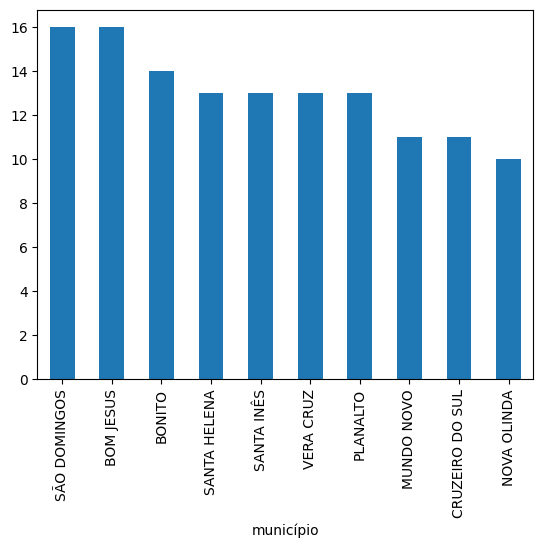

In [15]:
df['município'].value_counts().nlargest(10).plot(kind='bar')

### Qualidade dos Dados

Exercício 5: Existem dados nulos ou faltantes no Dataset, conjunto de dados?

In [17]:
df.isnull().sum()

,0
ano,0
codmun6,0
uf,0
codmun7,0
município,0
...,...
i_freq_prop,7
idhm,7
idhm_e,7
idhm_l,7


Exercício 6: Quais os tipos de dados existem no Dataset?

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Columns: 237 entries, ano to idhm_r
dtypes: float64(232), int64(4), object(1)
memory usage: 33.4+ MB


## DATA PREPARATION

Exercício 7: Qual/quais colunas tem dados faltantes?
Nenhuma
Exercício 8: Qual a % de dados faltantes nas colunas?
0%
Exercício 9: Aplicar algum método de escalonamento/normalização nos dados numérico.

Exercício 10: Aplicar algum métedo mudança em variáveis categoricas.

In [20]:
# 6. Verificar os tipos de dados
print("Tipos de dados das colunas:")
print(df.dtypes)

# 7. Identificar colunas com dados faltantes
missing_columns = df.columns[df.isnull().any()]
print("\nColunas com dados faltantes:")
print(missing_columns)

# Exibir a quantidade de dados faltantes em cada coluna
missing_counts = df[missing_columns].isnull().sum()
print("\nQuantidade de dados faltantes por coluna:")
print(missing_counts)

# Exibir a porcentagem de dados faltantes em cada coluna
missing_percentage = (missing_counts / len(df)) * 100
print("\nPorcentagem de dados faltantes por coluna:")
print(missing_percentage)

Tipos de dados das colunas:
ano              int64
codmun6          int64
uf               int64
codmun7          int64
município       object
                ...   
i_freq_prop    float64
idhm           float64
idhm_e         float64
idhm_l         float64
idhm_r         float64
Length: 237, dtype: object

Colunas com dados faltantes:
Index(['t_freq0a3', 't_freq4a5', 't_freq4a6', 't_freqfund45', 'corte4',
       'corte9', 'gini', 'pind', 'rmpob', 'rpob',
       ...
       'pia1517', 'pia18m', 'pop', 'popt', 'i_escolaridade', 'i_freq_prop',
       'idhm', 'idhm_e', 'idhm_l', 'idhm_r'],
      dtype='object', length=145)

Quantidade de dados faltantes por coluna:
t_freq0a3       6460
t_freq4a5       6460
t_freq4a6       6460
t_freqfund45    6459
corte4             1
                ... 
i_freq_prop        7
idhm               7
idhm_e             7
idhm_l             7
idhm_r             7
Length: 145, dtype: int64

Porcentagem de dados faltantes por coluna:
t_freq0a3       35.011652
t_f

In [21]:
# Normalização dos dados numéricos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df_scaled = df.copy()
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df_scaled.head()

,ano,codmun6,uf,codmun7,município,espvida,fectot,mort1,mort5,razdep,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,0.0,0.000000,0.0,0.000000,ALTA FLORESTA D'OESTE,0.398988,0.384203,0.332258,0.339429,0.457880,...,NaN,NaN,0.002060,0.002011,0.144110,0.106806,0.281671,0.125153,0.399132,0.433535
1,0.0,0.000002,0.0,0.000002,ARIQUEMES,0.543910,0.336011,0.214100,0.221932,0.427842,...,NaN,NaN,0.004982,0.004893,0.248120,0.201047,0.420485,0.231902,0.544469,0.549849
2,0.0,0.000005,0.0,0.000004,CABIXI,0.440549,0.358768,0.295888,0.303347,0.489619,...,NaN,NaN,0.000644,0.000490,0.136591,0.103665,0.254717,0.120245,0.440347,0.303625
3,0.0,0.000007,0.0,0.000008,CACOAL,0.508132,0.348059,0.240795,0.248623,0.437543,...,NaN,NaN,0.006155,0.005925,0.218045,0.169634,0.386792,0.197546,0.507592,0.549849
4,0.0,0.000010,0.0,0.000010,CEREJEIRAS,0.425009,0.313253,0.309146,0.316622,0.437372,...,NaN,NaN,0.001705,0.001670,0.187970,0.175916,0.358491,0.192638,0.425163,0.480363


In [22]:
# 10.
import pandas as pd
from sklearn.preprocessing import LabelEncoder


print("Colunas do DataFrame:")
print(df.columns)

print("\nTipos de dados das colunas:")
print(df.dtypes)

categorical_columns = df.select_dtypes(include=['object']).columns
print("\nColunas categóricas:")
print(categorical_columns)

df_one_hot = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("\nDataFrame após One-Hot Encoding:")
print(df_one_hot.head())

if 'município' in categorical_columns:
    label_encoder = LabelEncoder()
    df['município_encoded'] = label_encoder.fit_transform(df['município'])
    print("\nDataFrame após Label Encoding na coluna 'município':")
    print(df[['município', 'município_encoded']].head())
else:
    print("\nColuna 'município' não encontrada entre as colunas categóricas.")

print("\nDataFrame final:")
print(df.head())


Colunas do DataFrame:
Index(['ano', 'codmun6', 'uf', 'codmun7', 'município', 'espvida', 'fectot',
       'mort1', 'mort5', 'razdep',
       ...
       'pia1517', 'pia18m', 'pop', 'popt', 'i_escolaridade', 'i_freq_prop',
       'idhm', 'idhm_e', 'idhm_l', 'idhm_r'],
      dtype='object', length=237)

Tipos de dados das colunas:
ano              int64
codmun6          int64
uf               int64
codmun7          int64
município       object
                ...   
i_freq_prop    float64
idhm           float64
idhm_e         float64
idhm_l         float64
idhm_r         float64
Length: 237, dtype: object

Colunas categóricas:
Index(['município'], dtype='object')

DataFrame após One-Hot Encoding:
    ano  codmun6  uf  codmun7  espvida  fectot  mort1  mort5  razdep  sobre40  \
0  1991   110001  11  1100015    62.01    4.08  45.58  58.05   73.50    83.81   
1  1991   110002  11  1100023    66.02    3.72  32.39  41.41   69.97    88.08   
2  1991   110003  11  1100031    63.16    3.89  41.52  